In [1]:
import numpy
import pandas as pd
import csv
import matplotlib.pyplot as plt
import os

In [117]:
folder_bench='results-'
folder_cass='results-cassandra'
#default
experiment_date='2019-10-02T150138'
#large baggage
#experiment_date='2019-10-02T151015'
files = []

In [118]:
folder=folder_bench+experiment_date
with os.scandir(folder) as it:
    for file in it:
        if file.name.endswith('.csv') & file.is_file():
            files.append(folder+'/'+file.name)

In [119]:
data = pd.concat([pd.read_csv(f) for f in files])
traces = pd.read_csv(folder_cass+'/'+'traces-'+experiment_date+'.csv')

In [120]:
dft = pd.DataFrame(traces)
df = pd.DataFrame(data)
df['SpanDuration'] = df.FinishTime - df.StartTime
df.head(10)

,Service,TraceNumber,SpanNumber,StartTime,FinishTime,Sampled,SpanDuration
0,svc07,0,0,1570021299317718023,1570021299334590247,True,16872224
1,svc07,0,-1,1570021299317690653,1570021299334592437,True,16901784
2,svc07,1,0,1570021299367590072,1570021299384453625,True,16863553
3,svc07,1,-1,1570021299367562842,1570021299384456665,True,16893823
4,svc07,2,0,1570021299415200022,1570021299431698410,True,16498388
5,svc07,2,-1,1570021299415185132,1570021299431701620,True,16516488
6,svc07,3,0,1570021299464037541,1570021299480270861,True,16233320
7,svc07,3,-1,1570021299464012021,1570021299480273501,True,16261480
8,svc07,4,0,1570021299514775381,1570021299531185529,True,16410148
9,svc07,4,-1,1570021299514762691,1570021299531191259,True,16428568


In [121]:
df_transformed = df.copy()
df_transformed.StartTime = df.StartTime / 1000.0
df_transformed.FinishTime = df.FinishTime / 1000.0
df_transformed.SpanDuration = df.SpanDuration / 1000.0
df_transformed = df_transformed.astype({'StartTime': 'int64', 'FinishTime': 'int64', 'SpanDuration': 'int64'})
#Filter non-sampled span data
df_transformed = df_transformed.loc[df_transformed['Sampled']]
df_transformed = df_transformed.sort_values(by = 'StartTime')
df_transformed.reset_index(drop=True, inplace=True)
dft_sorted = dft.sort_values(by = 'start_time')
dft_sorted.reset_index(drop=True, inplace=True)

In [122]:
if len(dft_sorted) != len(df_transformed):
    print("Length of datasets is different!!")

In [123]:
df = dft_sorted.join(df_transformed)
df.head(10)

,trace_id,span_id,span_hash,duration,flags,logs,operation_name,parent_id,process,refs,start_time,tags,write_time,Service,TraceNumber,SpanNumber,StartTime,FinishTime,Sampled,SpanDuration
0,0x0000000000000000090df057df27aa7e,652441781235329662,-8257814329349878841,11045,1,"[{ts: 1570021298332266, fields: [{key: 'event'...",svc01-parent,0,"{service_name: 'svc01', tags: [{key: 'jaeger.v...",NaN,1570021298332229,"[{key: 'sampler.type', value_type: 'string', v...",1570021299287577,svc01,0,-1,1570021298332226,1570021298343275,True,11048
1,0x0000000000000000090df057df27aa7e,2630236524563955861,-2407395849943996896,10994,1,NaN,svc01-call-0,0,"{service_name: 'svc01', tags: [{key: 'jaeger.v...","[{ref_type: 'child-of', trace_id: 0x0000000000...",1570021298332275,"[{key: 'internal.span.format', value_type: 'st...",1570021299287916,svc01,0,0,1570021298332274,1570021298343272,True,10997
2,0x0000000000000000090df057df27aa7e,1501548796430084148,2217531333117708388,5187,1,NaN,svc02-parent,0,"{service_name: 'svc02', tags: [{key: 'jaeger.v...","[{ref_type: 'child-of', trace_id: 0x0000000000...",1570021298337941,"[{key: 'VOYW6yGxmSGI5poPpnK1', value_type: 'st...",1570021299281747,svc02,0,-1,1570021298337939,1570021298343134,True,5194
3,0x0000000000000000090df057df27aa7e,66483306838154099,-8643799873592311319,5145,1,NaN,svc02-call-0,0,"{service_name: 'svc02', tags: [{key: 'jaeger.v...","[{ref_type: 'child-of', trace_id: 0x0000000000...",1570021298337975,"[{key: 'internal.span.format', value_type: 'st...",1570021299282045,svc02,0,0,1570021298337974,1570021298343126,True,5151
4,0x00000000000000004c2d81a1e0795394,5489186053090268052,1068960353401722700,11032,1,"[{ts: 1570021298382363, fields: [{key: 'event'...",svc01-parent,0,"{service_name: 'svc01', tags: [{key: 'jaeger.v...",NaN,1570021298382352,"[{key: 'sampler.type', value_type: 'string', v...",1570021299283839,svc01,1,-1,1570021298382349,1570021298393385,True,11035
5,0x00000000000000004c2d81a1e0795394,9125195422475915287,4096941394792147510,11001,1,NaN,svc01-call-0,0,"{service_name: 'svc01', tags: [{key: 'jaeger.v...","[{ref_type: 'child-of', trace_id: 0x0000000000...",1570021298382372,"[{key: 'internal.span.format', value_type: 'st...",1570021299284108,svc01,1,0,1570021298382371,1570021298393379,True,11008
6,0x00000000000000004c2d81a1e0795394,2791376525805429857,106737155847636163,5227,1,NaN,svc02-parent,0,"{service_name: 'svc02', tags: [{key: 'jaeger.v...","[{ref_type: 'child-of', trace_id: 0x0000000000...",1570021298387981,"[{key: 'VOYW6yGxmSGI5poPpnK1', value_type: 'st...",1570021299281056,svc02,1,-1,1570021298387978,1570021298393209,True,5231
7,0x00000000000000004c2d81a1e0795394,5644248077606553275,-7901411732775731,5200,1,NaN,svc02-call-0,0,"{service_name: 'svc02', tags: [{key: 'jaeger.v...","[{ref_type: 'child-of', trace_id: 0x0000000000...",1570021298387995,"[{key: 'internal.span.format', value_type: 'st...",1570021299283047,svc02,1,0,1570021298387994,1570021298393204,True,5209
8,0x000000000000000022aededd319cab71,2499179884838693745,-8303920352126206511,11157,1,"[{ts: 1570021298432346, fields: [{key: 'event'...",svc01-parent,0,"{service_name: 'svc01', tags: [{key: 'jaeger.v...",NaN,1570021298432284,"[{key: 'sampler.type', value_type: 'string', v...",1570021299286486,svc01,2,-1,1570021298432280,1570021298443443,True,11162
9,0x000000000000000022aededd319cab71,1356806617284813958,8382955474231475166,11070,1,NaN,svc01-call-0,0,"{service_name: 'svc01', tags: [{key: 'jaeger.v...","[{ref_type: 'child-of', trace_id: 0x0000000000...",1570021298432358,"[{key: 'internal.span.format', value_type: 'st...",1570021299284180,svc01,2,0,1570021298432356,1570021298443437,True,11080


## Assumptions for Calculations
Assumptions necessary for calculation of trace completion times, i.e. the point in time a all Spans of a trace have been written to a database.
1. All Traces are completed, i.e. all Spans part of a Trace are in the dataset
1. All Spans are sorted by their StartTime in ascending order
    * Monotonic increasing timestamps can only be assumed safely while there are no "parallel" paths in a trace
    * Also, work time distributions other than static ones will inevitably disperse spans across the dataset
1. There is one operation/service, that is consistently the 'last' one to be invoked and also the last one in the dataset
    * This operation serves as a marker for the last Span in a trace
    * Probably the first assumption that has to be revoked -> we need to to "count" spans part of a trace as an alternative to static iteration

In [124]:
df['span_visibility'] = df.write_time - df.StartTime
starttime = 0
completion_times = []
write_times_tmp = []
for index, row in df.iterrows():
    #save the write time of current span in temp list
    write_times_tmp.append(row['write_time'])
    if row['operation_name'] == 'svc01-parent':
        #if the operation name is the root operation, we can assume this is the first time a trace has been seen,
        #so use this start time for the trace
        starttime = row['StartTime']
    if row['operation_name'] == 'svc10-parent':
        #this is the "last" span in the deployment, so we can safely assume for this trace no more spans(=rows)
        #follow because they are sorted by time in monotonically increasing order
        #take the maximum (i.e. latest) of write times and subtract the starttime to get trace completion time
        #TODO: can we use a generic approach to identify the "last" span in the list of all created spans?
        #TODO: it would make more sense to have the trace completion time at the root span (or at all spans?)
        completion_times.append(max(write_times_tmp) - starttime)
        write_times_tmp = []
    else:
        #for all rows that are not the last span of a trace, add a zero,
        #so we can easily add the list to the pandas dataframe
        completion_times.append(0)

In [125]:
zeroCount = 0
completion_times_f = completion_times.copy()
for i in range(0,len(completion_times)):
    if completion_times[i] == 0:
        zeroCount = zeroCount + 1
    else:
        for j in range(i-zeroCount, i):
            completion_times_f[j] = completion_times[i]
        zeroCount = 0
#completion_times_f
df['completion_time'] = completion_times_f

In [126]:
df.head(6)

,trace_id,span_id,span_hash,duration,flags,logs,operation_name,parent_id,process,refs,...,write_time,Service,TraceNumber,SpanNumber,StartTime,FinishTime,Sampled,SpanDuration,span_visibility,completion_time
0,0x0000000000000000090df057df27aa7e,652441781235329662,-8257814329349878841,11045,1,"[{ts: 1570021298332266, fields: [{key: 'event'...",svc01-parent,0,"{service_name: 'svc01', tags: [{key: 'jaeger.v...",NaN,...,1570021299287577,svc01,0,-1,1570021298332226,1570021298343275,True,11048,955351,1112989
1,0x0000000000000000090df057df27aa7e,2630236524563955861,-2407395849943996896,10994,1,NaN,svc01-call-0,0,"{service_name: 'svc01', tags: [{key: 'jaeger.v...","[{ref_type: 'child-of', trace_id: 0x0000000000...",...,1570021299287916,svc01,0,0,1570021298332274,1570021298343272,True,10997,955642,1112989
2,0x0000000000000000090df057df27aa7e,1501548796430084148,2217531333117708388,5187,1,NaN,svc02-parent,0,"{service_name: 'svc02', tags: [{key: 'jaeger.v...","[{ref_type: 'child-of', trace_id: 0x0000000000...",...,1570021299281747,svc02,0,-1,1570021298337939,1570021298343134,True,5194,943808,1112989
3,0x0000000000000000090df057df27aa7e,66483306838154099,-8643799873592311319,5145,1,NaN,svc02-call-0,0,"{service_name: 'svc02', tags: [{key: 'jaeger.v...","[{ref_type: 'child-of', trace_id: 0x0000000000...",...,1570021299282045,svc02,0,0,1570021298337974,1570021298343126,True,5151,944071,1112989
4,0x00000000000000004c2d81a1e0795394,5489186053090268052,1068960353401722700,11032,1,"[{ts: 1570021298382363, fields: [{key: 'event'...",svc01-parent,0,"{service_name: 'svc01', tags: [{key: 'jaeger.v...",NaN,...,1570021299283839,svc01,1,-1,1570021298382349,1570021298393385,True,11035,901490,1112989
5,0x00000000000000004c2d81a1e0795394,9125195422475915287,4096941394792147510,11001,1,NaN,svc01-call-0,0,"{service_name: 'svc01', tags: [{key: 'jaeger.v...","[{ref_type: 'child-of', trace_id: 0x0000000000...",...,1570021299284108,svc01,1,0,1570021298382371,1570021298393379,True,11008,901737,1112989


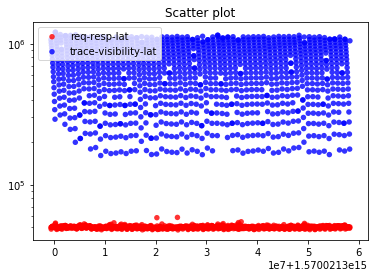

In [127]:
df.drop(df.index[:100], inplace=True)
df_roots = df.loc[df['operation_name'] == 'svc01-parent']
colors = {'red', 'blue'}
categories = {'req-resp-lat', 'trace-visibility-lat'}
columns = {'duration', 'completion_time'}
scatterplot = plt.figure()
ax = scatterplot.add_subplot(1, 1, 1)
for column, color, cat in zip(columns, colors, categories):
    x, y = df_roots['StartTime'], df_roots[column]
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=cat)
plt.title('Scatter plot')
plt.yscale("log")
plt.legend(loc=2)
plt.show()

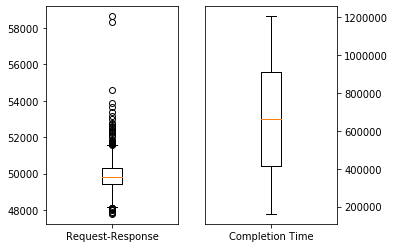

In [128]:
#plt.title('Visibility Delay')
figure1, axes = plt.subplots(1, 2)
#apparently we have too much stuff going on at the righthand y-axis, so we need to add extra space
figure1.subplots_adjust(right=0.8)
#axes[0].text('Latency [µs]')
label = 'default'
#label = 'large-baggage'
axes[0].boxplot([df_roots['duration']], labels=['Request-Response'])
#plt.savefig('latency-high-baggage.pdf')
axes[1].boxplot([df_roots['completion_time']], labels=['Completion Time'])
axes[1].yaxis.tick_right()
figure1.savefig('latency-'+label+'.pdf')
#plt.savefig('completion-high-baggage.pdf')
#plt.savefig('completion'+label+'.pdf')
#plot = plt.boxplot([df_roots['duration'], df_roots['completion_time']], labels=['Request-Response','Trace Completion'])

In [129]:
df_roots = df_roots[['duration', 'SpanDuration', 'span_visibility', 'completion_time']]
numpy.round(df_roots.describe().T, 2).to_csv('summary-'+label+'.csv', sep=',')